In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [22]:
df=pd. read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head(4)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000


In [23]:
# df.isnull().sum()
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.isnull().sum()

C:\Users\susov\AppData\Local\Temp\ipykernel_2940\1974172452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]
print(x,y)

           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## train_test_split 
-> is a function from scikit-learn (sklearn.model_selection) that splits your dataset into two parts:

Training set → for training your model

Testing set → for evaluating your model

It can split both features (X) and labels (y) at the same time.

## Meaning of each parameter
x → Your input features (independent variables).

y → Your target labels (dependent variable).

test_size=0.2 → 20% of the data goes to the test set, 80% goes to the train set.

random_state=42 → Fixes the random shuffling so you get the same split every time (helps reproducibility).

If you have 100 samples:

test_size=0.2 → 20 samples go to the test set, 80 samples go to the train set.

In [25]:
X_train,X_test, Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

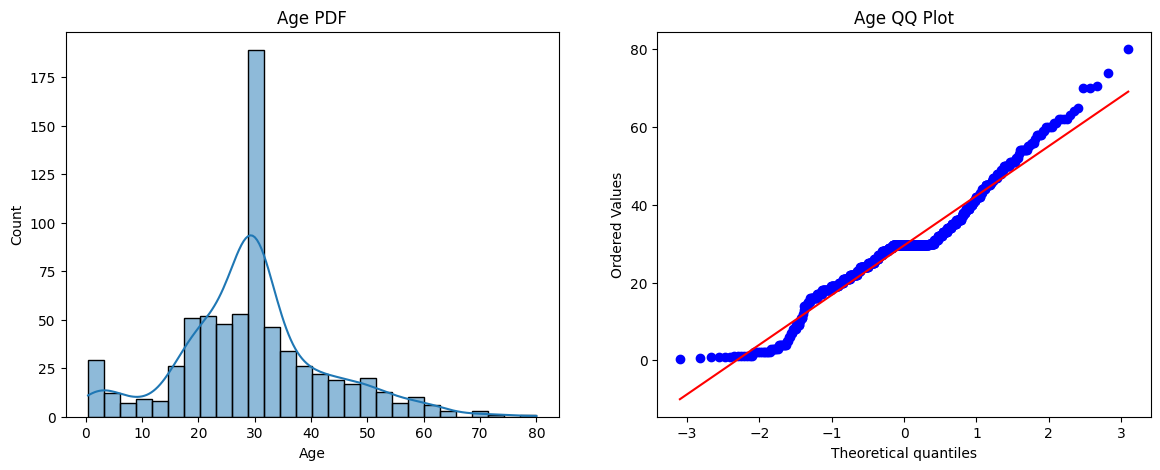

In [26]:
##  Checks if your X_train["Age"] follows a normal distribution.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(X_train["Age"], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(X_train["Age"],dist="norm",plot=plt) ## stats.probplot: From scipy.stats, it makes a QQ plot (Quantile-Quantile plot).
plt.title("Age QQ Plot")

plt.show()

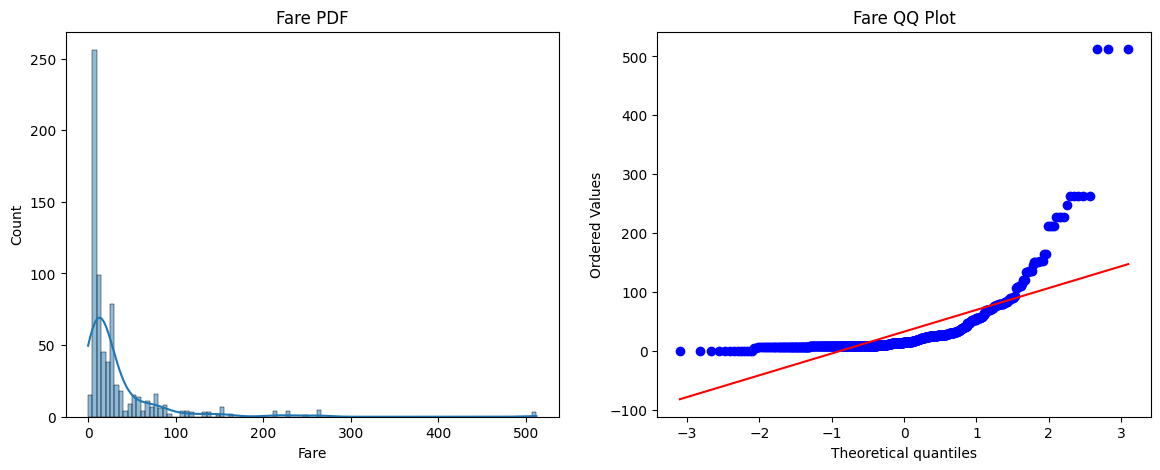

In [28]:
## c#  Checks if your X_train["Fare"] follows a normal distribution.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(X_train["Fare"], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
plt.title("Fare PDF")  ### Right skewed 

plt.subplot(1,2,2)
stats.probplot(X_train["Fare"],dist="norm",plot=plt) ## stats.probplot: From scipy.stats, it makes a QQ plot (Quantile-Quantile plot).
plt.title("Fare QQ Plot")

plt.show()

In [29]:
### two different model objects, each from different types of machine learning algorithms.
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


In [30]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print("Accuracy of LR: ",accuracy_score(Y_test,y_pred))
print("Accuracy of DT: ",accuracy_score(Y_test,y_pred2))

Accuracy of LR:  0.6480446927374302
Accuracy of DT:  0.664804469273743


In [ ]:
## Log Transformer
trf=FunctionTransformer(func=np.log1p)

In [32]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [48]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy of LR: ",accuracy_score(Y_test,y_pred))
print("Accuracy of DT: ",accuracy_score(Y_test,y_pred2))

Accuracy of LR:  0.6815642458100558
Accuracy of DT:  0.6983240223463687


## cross_val_score 
is a model evaluation function in scikit-learn that helps you measure how well your machine learning model performs using cross-validation instead of a single train-test split.


cross_val_score(clf, x_trans, y, scoring="accuracy", cv=10)
clf → Your LogisticRegression model.

x_trans → Transformed features after applying your ColumnTransformer.

y → Target labels (first column from your dataset).

scoring="accuracy" → The metric used is accuracy (percentage of correct predictions).

cv=10 → 10-fold cross-validation means:
Your dataset is split into 10 equal parts.
Model trains on 9 parts, tests on the remaining 1.
This is repeated 10 times, each time with a different part used as test data.

It returns 10 accuracy scores.

In [54]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR : ",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT : ",np.mean(cross_val_score(clf2,x_transformed,y,scoring="accuracy",cv=10)))


LR :  0.678027465667915
DT :  0.6610861423220974


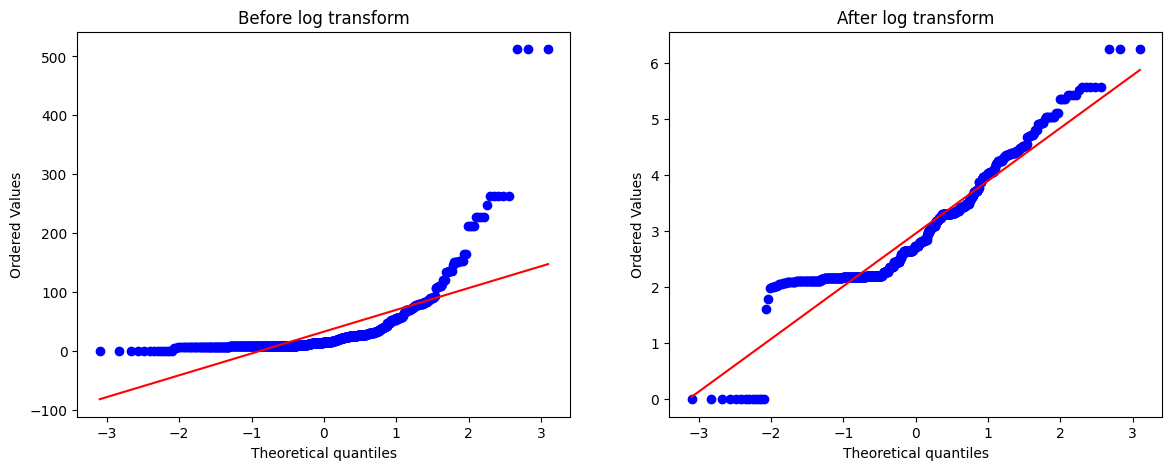

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(X_train["Fare"],dist="norm",plot=plt) ## QQ Plot
plt.title("Before log transform")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist="norm",plot=plt)   ## QQ Plot
plt.title("After log transform")

plt.show()

## you can see that data right skewness reduce

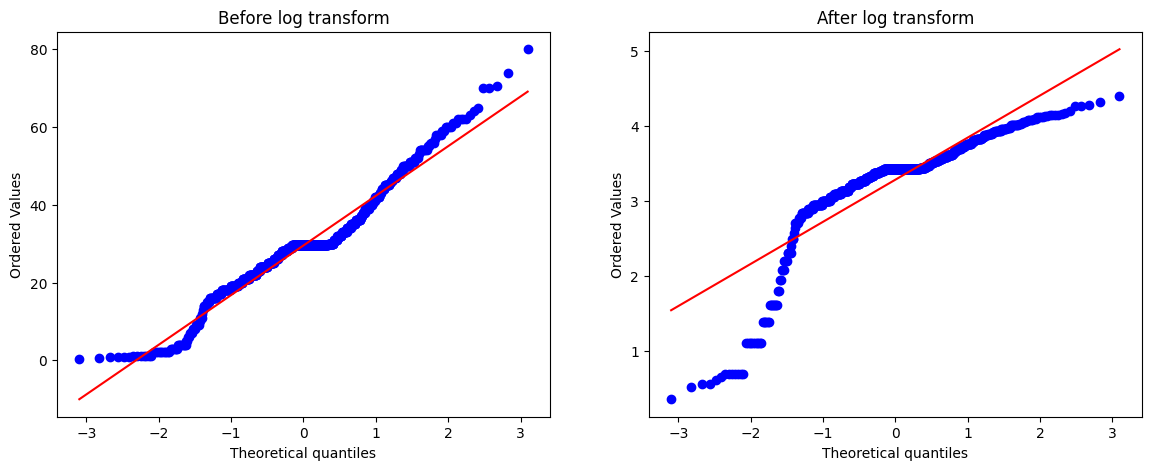

In [57]:
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(X_train["Age"],dist="norm",plot=plt) ## QQ Plot
plt.title("Before log transform")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist="norm",plot=plt)   ## QQ Plot
plt.title("After log transform")

plt.show()

### ColumnTransformer 
lets you apply transformations only to specific columns ("Fare" here)

"log" is just a name for this transformation step

FunctionTransformer(transform) applies your passed-in function

remainder="passthrough" means: keep all other columns unchanged

In [59]:
trf2=ColumnTransformer([("log",FunctionTransformer(np.log1p),["Fare"])],remainder="passthrough")

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)

In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,Y_train)
clf2.fit(X_test_transformed2,Y_test)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

print("Accuracy of LR: ",accuracy_score(Y_test,y_pred))
print("Accuracy of DT: ",accuracy_score(Y_test,y_pred2))

In [60]:
x_transformed2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR : ",np.mean(cross_val_score(clf,x_transformed2,y,scoring="accuracy",cv=10)))
print("DT : ",np.mean(cross_val_score(clf2,x_transformed2,y,scoring="accuracy",cv=10)))


LR :  0.6712609238451936
DT :  0.6566042446941324


In [67]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf=ColumnTransformer([("log",FunctionTransformer(transform),["Fare"])],remainder="passthrough")

    x_trans=trf.fit_transform(x)
    clf=LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

    plt.figure(figsize=(14,5))

    plt.subplot(121)
    stats.probplot(x["Fare"],dist="norm",plot=plt) ## QQ Plot
    plt.title("Before transform")

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist="norm",plot=plt)   ## QQ Plot
    plt.title("After log transform")

    plt.show()



Accuracy 0.6589013732833957


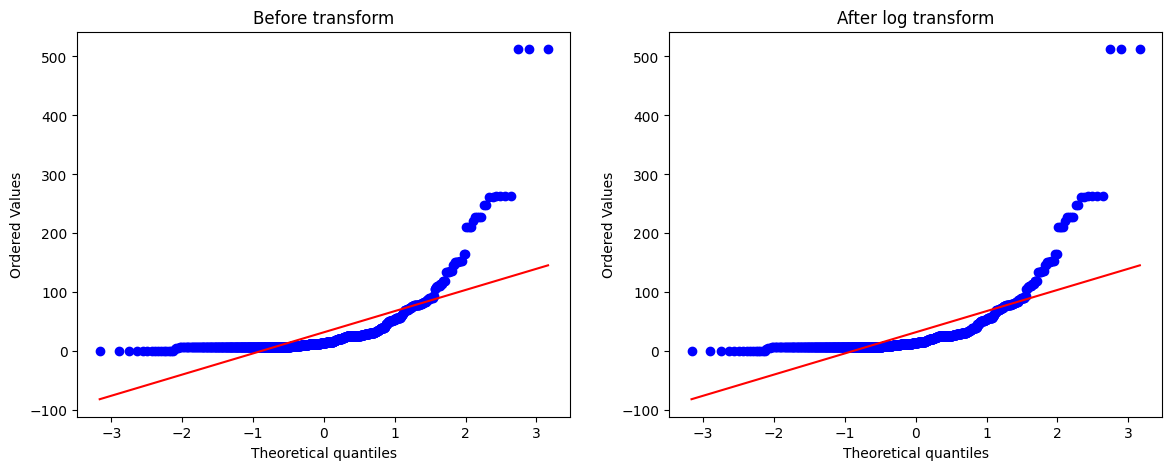

In [68]:
apply_transform(lambda x:x)

Accuracy 0.6431335830212235


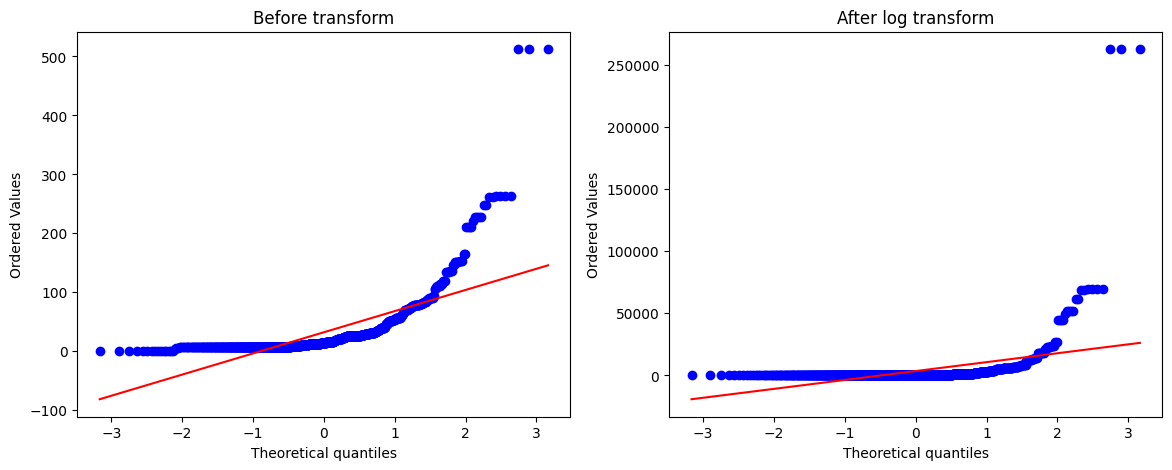

In [78]:
apply_transform(lambda x: x**2)

Accuracy 0.6611485642946316


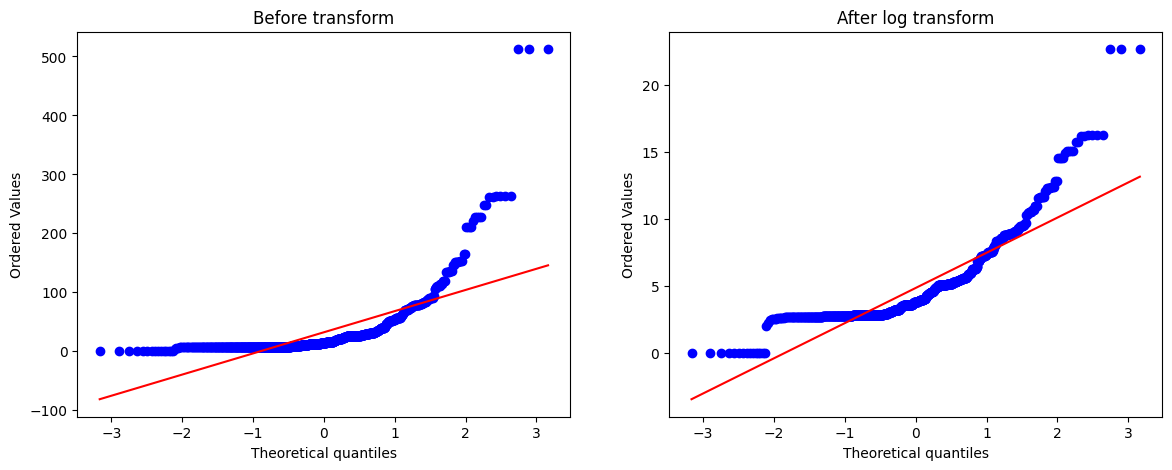

In [70]:
apply_transform(lambda x: x**(1/2))

Accuracy 0.616167290886392


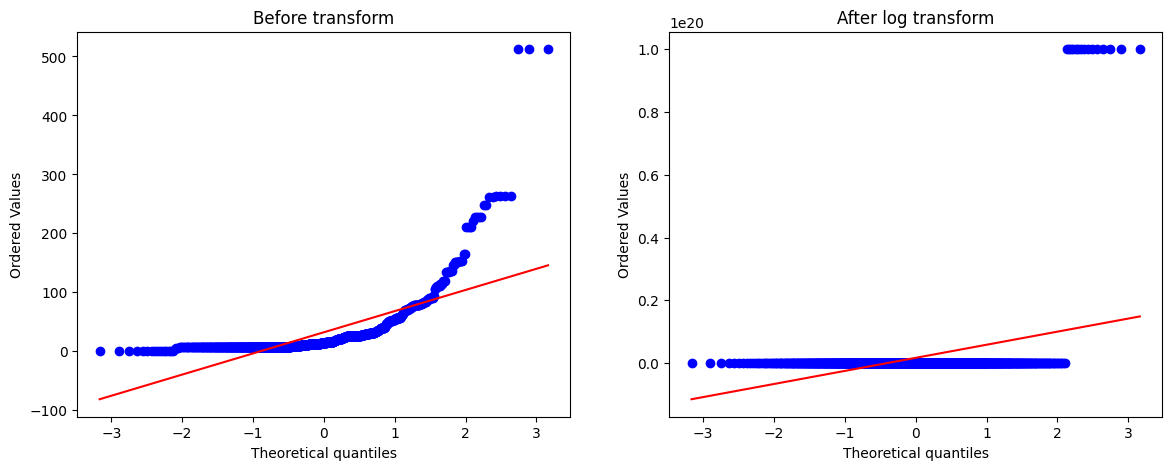

In [77]:
apply_transform(lambda x: 1/(x+0.00000000000000000001))